In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from plotly import tools
import plotly.express as px

In [3]:
complete_data = pd.read_csv('complete.csv')
complete_data.head()

Date Name of State / UT  Latitude  Longitude  \
0   30 January 2020             Kerala   10.8505    76.2711   
1   31 January 2020             Kerala   10.8505    76.2711   
2  01 February 2020             Kerala   10.8505    76.2711   
3  02 February 2020             Kerala   10.8505    76.2711   
4  03 February 2020             Kerala   10.8505    76.2711   

   Total Confirmed cases  Death  Cured/Discharged/Migrated  New cases  \
0                      1      0                          0          0   
1                      1      0                          0          0   
2                      2      0                          0          1   
3                      3      0                          0          1   
4                      3      0                          0          0   

   New deaths  New recovered  
0           0              0  
1           0              0  
2           0              0  
3           0              0  
4           0              0

In [4]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 10 columns):
Date                         3370 non-null object
Name of State / UT           3370 non-null object
Latitude                     3370 non-null float64
Longitude                    3370 non-null float64
Total Confirmed cases        3370 non-null int64
Death                        3370 non-null int64
Cured/Discharged/Migrated    3370 non-null int64
New cases                    3370 non-null int64
New deaths                   3370 non-null int64
New recovered                3370 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 263.4+ KB


In [5]:
complete_data['Date'] = pd.to_datetime(complete_data['Date'])
complete_data['Date'] = complete_data['Date'].dt.strftime('%Y/%m/%d')

In [6]:
complete_data.rename(columns={'Name of State / UT':'State/UT','Total Confirmed cases':'Confirmed',
                              'Cured/Discharged/Migrated':'Recovered'},inplace=True)

In [7]:
data = complete_data[['Date','State/UT','Confirmed','Death','Recovered']]
data.head()

Date State/UT  Confirmed  Death  Recovered
0  2020/01/30   Kerala          1      0          0
1  2020/01/31   Kerala          1      0          0
2  2020/02/01   Kerala          2      0          0
3  2020/02/02   Kerala          3      0          0
4  2020/02/03   Kerala          3      0          0

In [8]:
data.tail()

Date       State/UT  Confirmed  Death  Recovered
3365  2020/06/25      Telangana      10444    225       4361
3366  2020/06/25        Tripura       1259      1        897
3367  2020/06/25  Uttar Pradesh      19557    596      12586
3368  2020/06/25    Uttarakhand       2623     35       1721
3369  2020/06/25    West Bengal      15173    591       9702

In [9]:
data.isnull().sum()

Date         0
State/UT     0
Confirmed    0
Death        0
Recovered    0
dtype: int64

In [10]:
# getting number of active cases
data['Active'] = data['Confirmed'] - data['Death'] - data['Recovered']
data.head()

Date State/UT  Confirmed  Death  Recovered  Active
0  2020/01/30   Kerala          1      0          0       1
1  2020/01/31   Kerala          1      0          0       1
2  2020/02/01   Kerala          2      0          0       2
3  2020/02/02   Kerala          3      0          0       3
4  2020/02/03   Kerala          3      0          0       3

In [11]:
latest = data[data['Date'] == data['Date'].max()]
latest.head()

Date                     State/UT  Confirmed  Death  Recovered  \
3335  2020/06/25  Andaman and Nicobar Islands         56      0         43   
3336  2020/06/25               Andhra Pradesh      10331    124       4779   
3337  2020/06/25            Arunachal Pradesh        158      0         38   
3338  2020/06/25                        Assam       6198      9       3958   
3339  2020/06/25                        Bihar       8209     57       6113   

      Active  
3335      13  
3336    5428  
3337     120  
3338    2231  
3339    2039

In [12]:
dates = data.groupby('Date')[['Confirmed','Death','Recovered','Active']].sum().reset_index()
dates.head()

Date  Confirmed  Death  Recovered  Active
0  2020/01/30          1      0          0       1
1  2020/01/31          1      0          0       1
2  2020/02/01          2      0          0       2
3  2020/02/02          3      0          0       3
4  2020/02/03          3      0          0       3

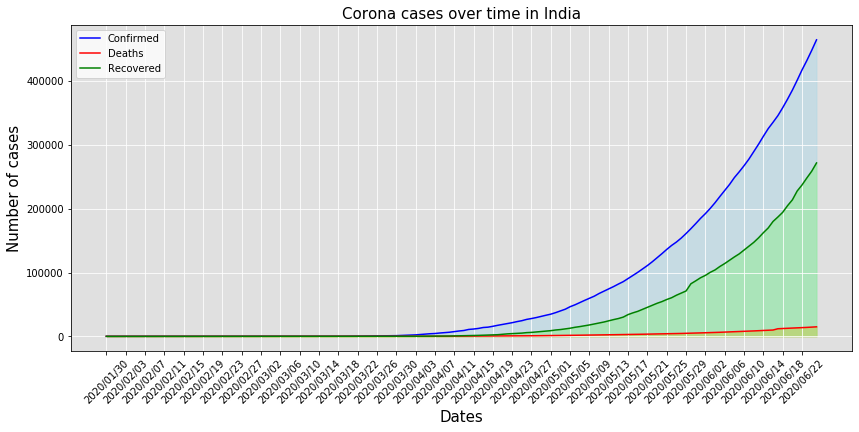

In [13]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.plot(dates.Date, dates.Confirmed, color='blue', label='Confirmed')
plt.plot(dates.Date, dates.Death, color='red', label='Deaths')
plt.plot(dates.Date, dates.Recovered, color='green', label='Recovered')
plt.fill_between(dates.Date, dates.Confirmed, color='lightblue', alpha=0.5)
plt.fill_between(dates.Date, dates.Death, color='orange', alpha=0.5)
plt.fill_between(dates.Date, dates.Recovered, color='lightgreen', alpha=0.5)
plt.xticks(dates.Date[::4],rotation='45')
plt.xlabel('Dates', size=15)
plt.ylabel('Number of cases', size=15)
plt.title('Corona cases over time in India', size=15)
plt.legend()
plt.show()

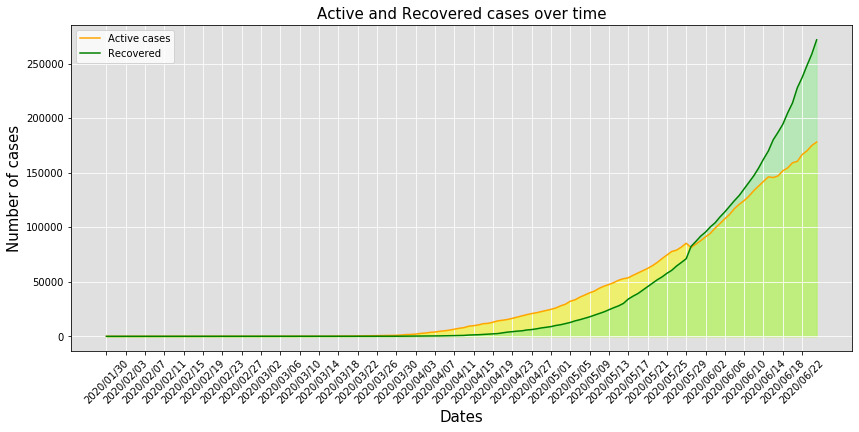

In [14]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.plot(dates.Date, dates.Active, color='orange', label='Active cases')
plt.plot(dates.Date, dates.Recovered, color='green', label='Recovered')
plt.fill_between(dates.Date, dates.Active, color='yellow', alpha=0.5)
plt.fill_between(dates.Date, dates.Recovered, color='lightgreen', alpha=0.5)
plt.xticks(dates.Date[::4],rotation='45')
plt.xlabel('Dates', size=15)
plt.ylabel('Number of cases', size=15)
plt.title('Active and Recovered cases over time', size=15)
plt.legend()
plt.show()

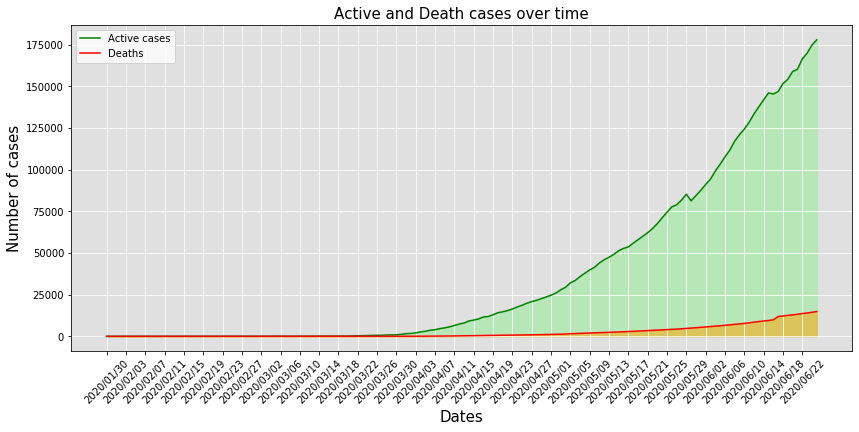

In [15]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.plot(dates.Date, dates.Active, color='green', label='Active cases')
plt.plot(dates.Date, dates.Death, color='red', label='Deaths')
plt.fill_between(dates.Date, dates.Active, color='lightgreen', alpha=0.5)
plt.fill_between(dates.Date, dates.Death, color='orange', alpha=0.5)
plt.xticks(dates.Date[::4],rotation='45')
plt.xlabel('Dates', size=15)
plt.ylabel('Number of cases', size=15)
plt.title('Active and Death cases over time', size=15)
plt.legend()
plt.show()

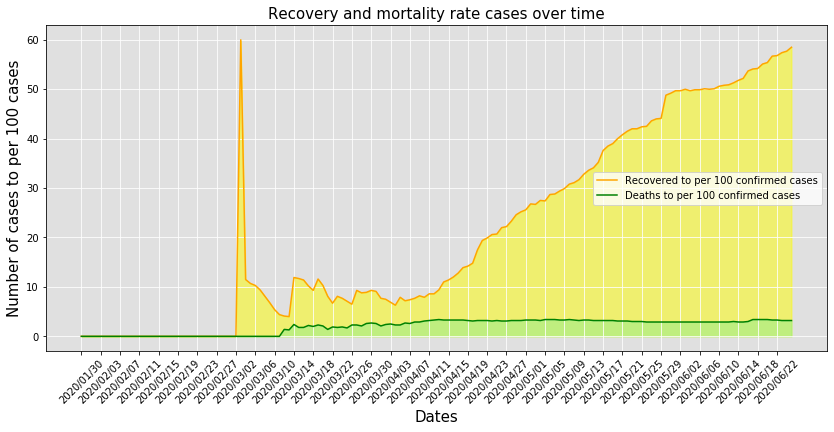

In [16]:
recovery_rate = np.round(dates['Recovered']/dates['Confirmed'], 3)*100
mortality_rate = np.round(dates['Death']/dates['Confirmed'], 3)*100

plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.plot(dates.Date, recovery_rate, color='orange', label='Recovered to per 100 confirmed cases')
plt.plot(dates.Date, mortality_rate, color='green', label='Deaths to per 100 confirmed cases')
plt.fill_between(dates.Date, recovery_rate, color='yellow', alpha=0.5)
plt.fill_between(dates.Date, mortality_rate, color='lightgreen', alpha=0.5)
plt.xticks(dates.Date[::4],rotation='45')
plt.xlabel('Dates', size=15)
plt.ylabel('Number of cases to per 100 cases', size=15)
plt.title('Recovery and mortality rate cases over time', size=15)
plt.legend()
plt.show()

In [17]:
dates['New_cases'] = 0
for i in dates.index-1:
    dates['New_cases'].iloc[i] = dates['Confirmed'].iloc[i]-dates['Confirmed'].iloc[i-1]
dates['New_cases'].iloc[0] = dates['Confirmed'].iloc[0]
dates.head()

Date  Confirmed  Death  Recovered  Active  New_cases
0  2020/01/30          1      0          0       1          1
1  2020/01/31          1      0          0       1          0
2  2020/02/01          2      0          0       2          1
3  2020/02/02          3      0          0       3          1
4  2020/02/03          3      0          0       3          0

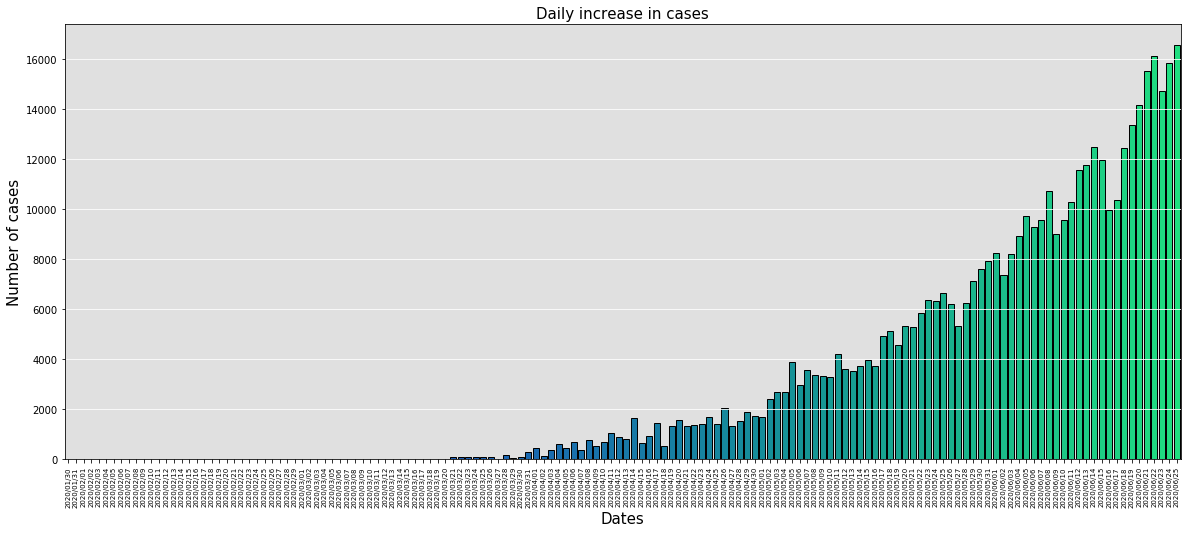

In [18]:
plt.figure(figsize=(20,8))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
sns.barplot(dates.Date, dates.New_cases, palette='winter', edgecolor='k')
plt.xticks(rotation='90', size=7)
plt.title('Daily increase in cases', size=15)
plt.xlabel('Dates', size=15)
plt.ylabel('Number of cases', size=15)
plt.show()

In [19]:
temp = data.groupby(['Date','State/UT'])[['Confirmed','Death','Recovered','Active']].sum().reset_index()
temp.head()

Date State/UT  Confirmed  Death  Recovered  Active
0  2020/01/30   Kerala          1      0          0       1
1  2020/01/31   Kerala          1      0          0       1
2  2020/02/01   Kerala          2      0          0       2
3  2020/02/02   Kerala          3      0          0       3
4  2020/02/03   Kerala          3      0          0       3

In [20]:
temp['size'] = temp['Confirmed'].pow(0.3) * 3.5
temp['Latitude'] = complete_data['Latitude']
temp['Longitude'] = complete_data['Longitude']
px.scatter_geo(temp, lat='Latitude', lon='Longitude', locationmode='country names', color='Confirmed',
               hover_name='State/UT', size='size', range_color=[1,100], scope='asia', animation_frame='Date', 
               projection='natural earth', color_continuous_scale='jet', title='Covid-19 cases over time in India').show()

***Observation:***

From this map, we can see clearly that disease is well spread in Maharashtra. We can also able to observe that Delhi and Tamil Nadu are following the trend of Maharashtra and are having high numbers.

In [21]:
latest_data = latest.groupby('State/UT')['Confirmed','Death','Recovered','Active'].sum().reset_index()
latest_data.head()

State/UT  Confirmed  Death  Recovered  Active
0  Andaman and Nicobar Islands         56      0         43      13
1               Andhra Pradesh      10331    124       4779    5428
2            Arunachal Pradesh        158      0         38     120
3                        Assam       6198      9       3958    2231
4                        Bihar       8209     57       6113    2039

In [22]:
top20_states = latest_data.sort_values('Confirmed',ascending=False).head(20).reset_index()
top20_states = top20_states.drop('index', axis=1)
top20_states

State/UT  Confirmed  Death  Recovered  Active
0         Maharashtra     142900   6739      73792   62369
1               Delhi      70390   2365      41437   26588
2          Tamil Nadu      67468    866      37763   28839
3             Gujarat      28943   1735      21088    6120
4       Uttar Pradesh      19557    596      12586    6375
5           Rajasthan      16009    375      12611    3023
6         West Bengal      15173    591       9702    4880
7      Madhya Pradesh      12448    534       9473    2441
8             Haryana      12010    188       6925    4897
9           Telangana      10444    225       4361    5858
10     Andhra Pradesh      10331    124       4779    5428
11          Karnataka      10118    164       6151    3803
12              Bihar       8209     57       6113    2039
13  Jammu and Kashmir       6422     88       3818    2516
14              Assam       6198      9       3958    2231
15             Odisha       5752     17       4123    1612
16             Punjab       4627    113       3099    1415
17             Kerala       3603     22       1888    1693
18        Uttarakhand       2623     35       1721     867
19       Chhattisgarh       2419     12       1627     780

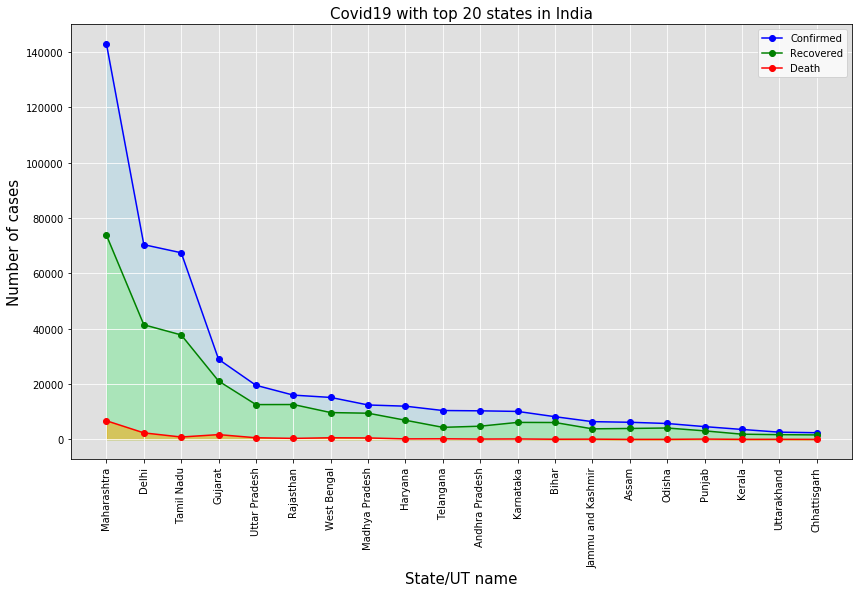

In [23]:
plt.figure(figsize=(14,8))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.plot(top20_states['State/UT'],top20_states['Confirmed'], 'bo-', label='Confirmed')
plt.plot(top20_states['State/UT'],top20_states['Recovered'], 'go-', label='Recovered')
plt.plot(top20_states['State/UT'],top20_states['Death'], 'ro-', label='Death')
plt.fill_between(top20_states['State/UT'],top20_states['Confirmed'], color='lightblue', alpha=0.5)
plt.fill_between(top20_states['State/UT'],top20_states['Recovered'], color='lightgreen', alpha=0.5)
plt.fill_between(top20_states['State/UT'],top20_states['Death'], color='orange', alpha=0.5)
plt.title('Covid19 with top 20 states in India', size=15)
plt.xlabel('State/UT name', size=15)
plt.xticks(rotation='90')
plt.ylabel('Number of cases', size=15)
plt.legend()
plt.show()

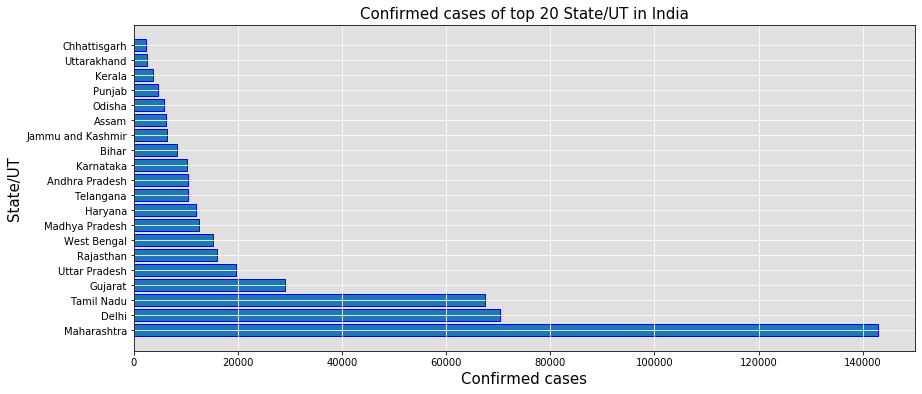

In [24]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.barh(top20_states['State/UT'],top20_states['Confirmed'], edgecolor='b')
plt.title('Confirmed cases of top 20 State/UT in India', size=15)
plt.xlabel('Confirmed cases', size=15)
plt.ylabel('State/UT', size=15)
plt.show()

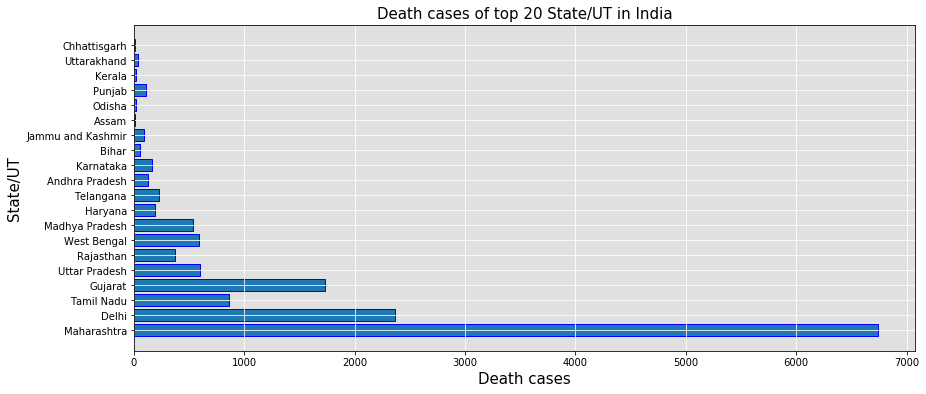

In [25]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.barh(top20_states['State/UT'],top20_states['Death'], edgecolor='b')
plt.title('Death cases of top 20 State/UT in India', size=15)
plt.xlabel('Death cases', size=15)
plt.ylabel('State/UT', size=15)
plt.show()

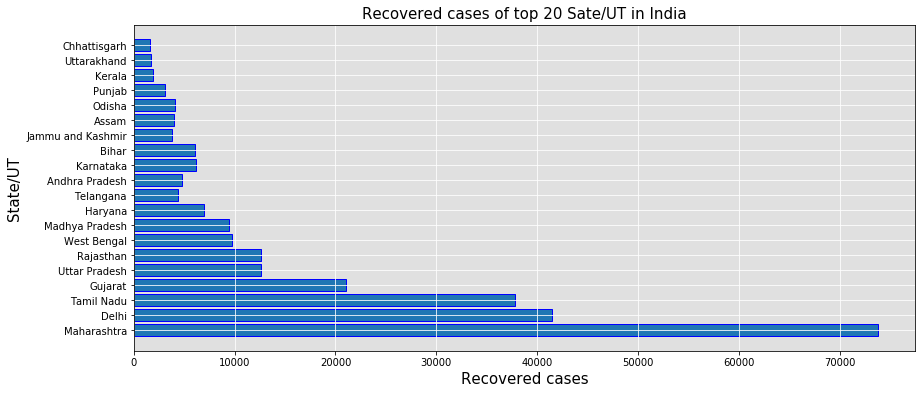

In [26]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.barh(top20_states['State/UT'],top20_states['Recovered'], edgecolor='b')
plt.title('Recovered cases of top 20 Sate/UT in India', size=15)
plt.xlabel('Recovered cases', size=15)
plt.ylabel('State/UT', size=15)
plt.show()

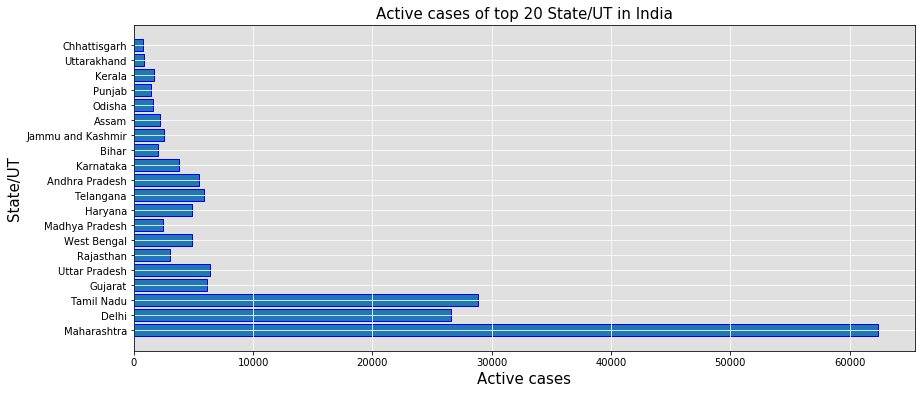

In [27]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.barh(top20_states['State/UT'],top20_states['Active'], edgecolor='b')
plt.title('Active cases of top 20 State/UT in India', size=15)
plt.xlabel('Active cases', size=15)
plt.ylabel('State/UT', size=15)
plt.show()

In [28]:
Maharashtra = temp[temp['State/UT'] == 'Maharashtra']
Delhi = temp[temp['State/UT'] == 'Delhi']
Tamil_Nadu = temp[temp['State/UT'] == 'Tamil Nadu']

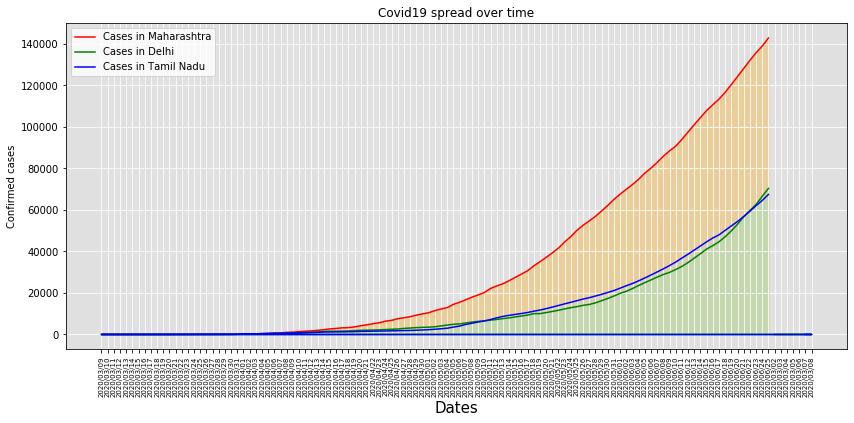

In [29]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.plot(Maharashtra['Date'], Maharashtra['Confirmed'], color='red', label='Cases in Maharashtra')
plt.plot(Delhi['Date'], Delhi['Confirmed'], color='green', label='Cases in Delhi')
plt.plot(Tamil_Nadu['Date'], Tamil_Nadu['Confirmed'], color='blue', label='Cases in Tamil Nadu')
plt.fill_between(Maharashtra['Date'], Maharashtra['Confirmed'], color='orange', alpha=0.3)
plt.fill_between(Delhi['Date'], Delhi['Confirmed'], color='lightgreen', alpha=0.3)
plt.fill_between(Tamil_Nadu['Date'], Tamil_Nadu['Confirmed'], color='lightblue', alpha=0.3)
plt.xlabel('Dates', size=15)
plt.xticks(rotation=90, size=7)
plt.ylabel('Confirmed cases')
plt.title('Covid19 spread over time')
plt.legend()
plt.show()

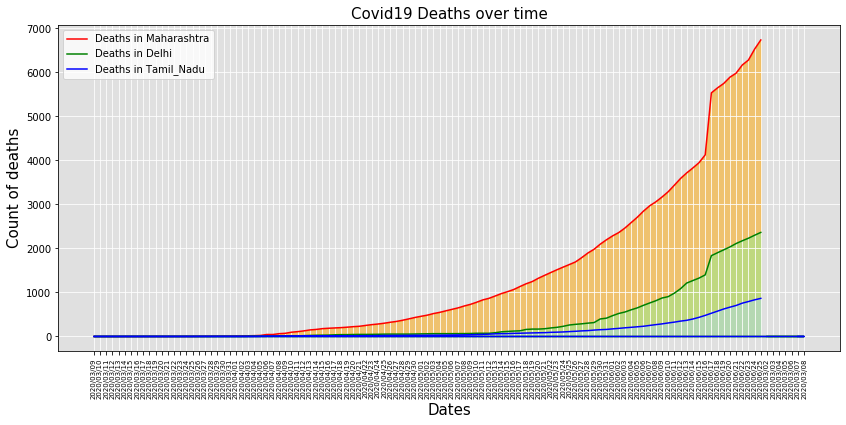

In [30]:
plt.figure(figsize=(14,6))
plt.grid(True, color='w')
plt.gca().patch.set_facecolor('0.88')
plt.plot(Maharashtra['Date'], Maharashtra['Death'], color='red', label='Deaths in Maharashtra')
plt.plot(Delhi['Date'], Delhi['Death'], color='green', label='Deaths in Delhi')
plt.plot(Tamil_Nadu['Date'], Tamil_Nadu['Death'], color='blue', label='Deaths in Tamil_Nadu')
plt.fill_between(Maharashtra['Date'], Maharashtra['Death'], color='orange', alpha=0.5)
plt.fill_between(Delhi['Date'], Delhi['Death'], color='lightgreen', alpha=0.5)
plt.fill_between(Tamil_Nadu['Date'], Tamil_Nadu['Death'], color='lightblue', alpha=0.5)
plt.xlabel('Dates', size=15)
plt.xticks(rotation=90, size=7)
plt.ylabel('Count of deaths', size=15)
plt.title('Covid19 Deaths over time', size=15)
plt.legend()
plt.show()

***Observation:*** \
On observing both Confirmed cases and Deaths over the time Delhi and Tamil Nadu are in the verge of repeating the Maharashtra, whereas the death rate in Maharashtra seems worse of all and it follows a increasing trend, which leaves us with the worries.